<a href="https://colab.research.google.com/github/JuanM-GG/sistemas-dinamicos-Python/blob/main/nonlinear_vs_linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Title: Comparison between nonlinear and linear simulation

Name: JM

Date:  December 2020

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint 

In [15]:
# function that returns dzdt
def model(z,t,u):
  x1 = z[0]
  x2 = z[1]

  dx1dt = - x1**2 + np.sqrt(u)
  dx2dt = - 4.0*(x2 - 2.0) + (1.0/8.0)*(u - 16.0)

  dzdt = [dx1dt, dx2dt]

  return dzdt

In [16]:
# steady state conditions 
x_ss = 2.0
u_ss = 16.0

In [27]:
# initial conditions 
z0 = [x_ss, x_ss]

In [18]:
# time points
t = np.linspace(0,10,101)

In [19]:
# step input
u = np.ones(len(t))*u_ss
u[11:] = u[11:] + 8.0
u[41:] = u[41:] - 16.0
u[71:] = u[71:] + 8.0

In [24]:
# store solution
x1 = np.empty_like(t)
x2 = np.empty_like(t)

In [28]:
# record initial conditions 
x1[0] = z0[0]
x2[0] = z0[1]

In [30]:
# solve ODE
for i in range(len(t) - 1):
  tspan = [t[i], t[i+1]]
  # solve for next step
  z = odeint(model,z0,tspan, args=(u[i+1],))
  # store solution for plotting 
  x1[i+1] = z[-1][0]
  x2[i+1] = z[-1][1]
  # next initial conditions
  z0 = z[-1]

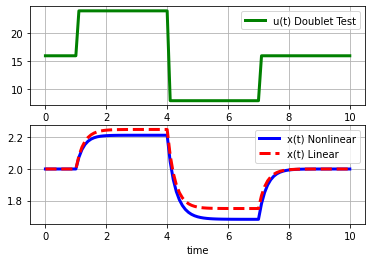

In [32]:
# plot results
plt.subplot(2,1,1)
plt.plot(t,u,"g-",linewidth = 3, label = "u(t) Doublet Test")
plt.grid()
plt.legend(loc = "best")
plt.subplot(2,1,2)
plt.plot(t,x1,"b-",linewidth = 3, label= "x(t) Nonlinear")
plt.plot(t,x2,"r--",linewidth = 3, label = "x(t) Linear")
plt.xlabel("time")
plt.grid()
plt.legend(loc = "best")